In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
d = fetch_california_housing()



In [3]:
feature_1 = ['A'] * 50 + ['B'] * 50 + ['C'] * 50

X = pd.DataFrame(feature_1, columns=['categorical_feature'])
y = [1] * 50 + [0] * 50 + [1] * 50

X['categorical_feature'] = X['categorical_feature'].astype('category')

In [4]:
np.__version__

'1.23.5'

In [5]:
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder

X_encoded = X.copy()

ordinal_encoder = OrdinalEncoder()

ordinal_encoder.fit(X_encoded)

X_encoded['categorical_feature'] = ordinal_encoder.transform(X_encoded)

model = lgb.LGBMClassifier(objective = 'binary')

model.fit(X_encoded, y)

explainer = shap.TreeExplainer(model, data = X_encoded,
                               feature_perturbation = "interventional",
                               model_output = 'probability')

shap_values = explainer.shap_values(X_encoded)

NameError: name 'shap' is not defined

In [ ]:
X = pd.DataFrame(data=d.data, columns=d.feature_names)
y = d.target

In [ ]:
import shap
shap.__version__

'0.41.0'

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


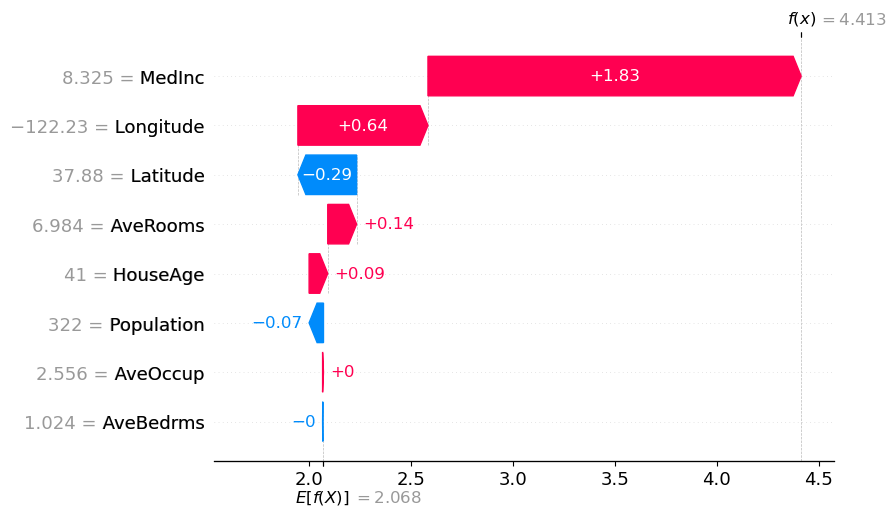

In [ ]:
import xgboost
import shap
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

# train an XGBoost model
# X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [1]:

import evolutionary_forest
evolutionary_forest.__version__

'0.1.0'

In [2]:

from numpy.testing import assert_almost_equal
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

from evolutionary_forest.forest import EvolutionaryForestRegressor


def test_simple_data():
    X, y = make_regression(n_samples=100, n_features=5, n_informative=5)
    gp = EvolutionaryForestRegressor(max_height=8, normalize=True, select='AutomaticLexicase', boost_size=10, n_gen=2,
                                     gene_num=5, base_learner='Random-DT')
    gp.fit(X, y)
    assert_almost_equal(mean_squared_error(y, gp.predict(X)), 0)
    assert len(gp.hof) == 10
    assert len(gp.hof[0].gene) == 5

/home/howt51/work/vscode_micromamba/kaggle/evolution_forest/.micromamba/envs/evolutionforest/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/howt51/work/vscode_micromamba/kaggle/evolution_forest/.micromamba/envs/evolutionforest/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/refer

In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
r = EvolutionaryForestRegressor(max_height=3, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True)
r.fit(x_train, y_train)
print(metrics.r2_score(y_test, r.predict(x_test)))

data shape (353, 10) (353,)
   	      	                                                          fitness                                                           	                                  size                                  
   	      	----------------------------------------------------------------------------------------------------------------------------	------------------------------------------------------------------------
gen	nevals	25%          	75%          	avg          	gen	max         	median       	min         	nevals	std         	25%	75%	avg  	gen	max	median	min	nevals	std     
0  	200   	[-0.25877309]	[-0.07430874]	[-0.17651154]	0  	[0.14487131]	[-0.17142439]	[-0.6606385]	200   	[0.13291745]	3  	4  	3.815	0  	5  	4     	3  	200   	0.608913
defaultdict(<class 'int'>, {'1': 200})
P value of different population 0.07127836506680116
Add(ARG8, ARG3)
Mul(AQ(ARG4, ARG7), Mul(ARG3, ARG0))
Add(ARG7, ARG7)
AQ(ARG7, ARG7)
Add(ARG1, ARG3)
AQ(ARG3, ARG7)
AQ(ARG2, ARG3)
M

In [4]:
import random
import string
import pandas as pd
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from evolutionary_forest.forest import EvolutionaryForestRegressor

random.seed(0)
np.random.seed(0)

# Generate dataset
X, y = make_friedman1(n_samples=100, n_features=5, random_state=0)

# Convert numpy arrays to pandas dataframe
X = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
y = pd.DataFrame(y, columns=['Target'])

In [5]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Train Evolutionary Forest
r = EvolutionaryForestRegressor(max_height=5, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True, n_process=1)
r.fit(x_train, y_train)

data shape (80, 5) (80,)
   	      	                                                          fitness                                                           	                                  size                                  
   	      	----------------------------------------------------------------------------------------------------------------------------	------------------------------------------------------------------------
gen	nevals	25%         	75%         	avg         	gen	max         	median      	min         	nevals	std         	25%	75%	avg  	gen	max	median	min	nevals	std     
0  	200   	[0.19012237]	[0.43453516]	[0.27484596]	0  	[0.66708961]	[0.33572612]	[-0.7157414]	200   	[0.25761531]	4  	4  	3.995	0  	6  	4     	3  	200   	0.644186
defaultdict(<class 'int'>, {'1': 200})
P value of different population 0.16016393690179076
Add(Sub(B, 1), Mul(1, D))
Mul(A, A)
Sub(C, C)
AQ(D, A)
AQ(A, C)
Add(D, E)
AQ(C, B)
Add(A, B)
AQ(1, B)
Mul(E, E)
Unique Hash [95, 93, 96, 88, 9

EvolutionaryForestRegressor(basic_primitives='Add,Sub,Mul,AQ', boost_size=100,
                            cross_pb=1, gene_num=10, mab_parameter={},
                            map_elite_parameter={}, max_height=5, n_pop=200,
                            select='AutomaticLexicase', verbose=True)

In [7]:
print(r2_score(y_test, r.predict(x_test)))

0.7600440680893789


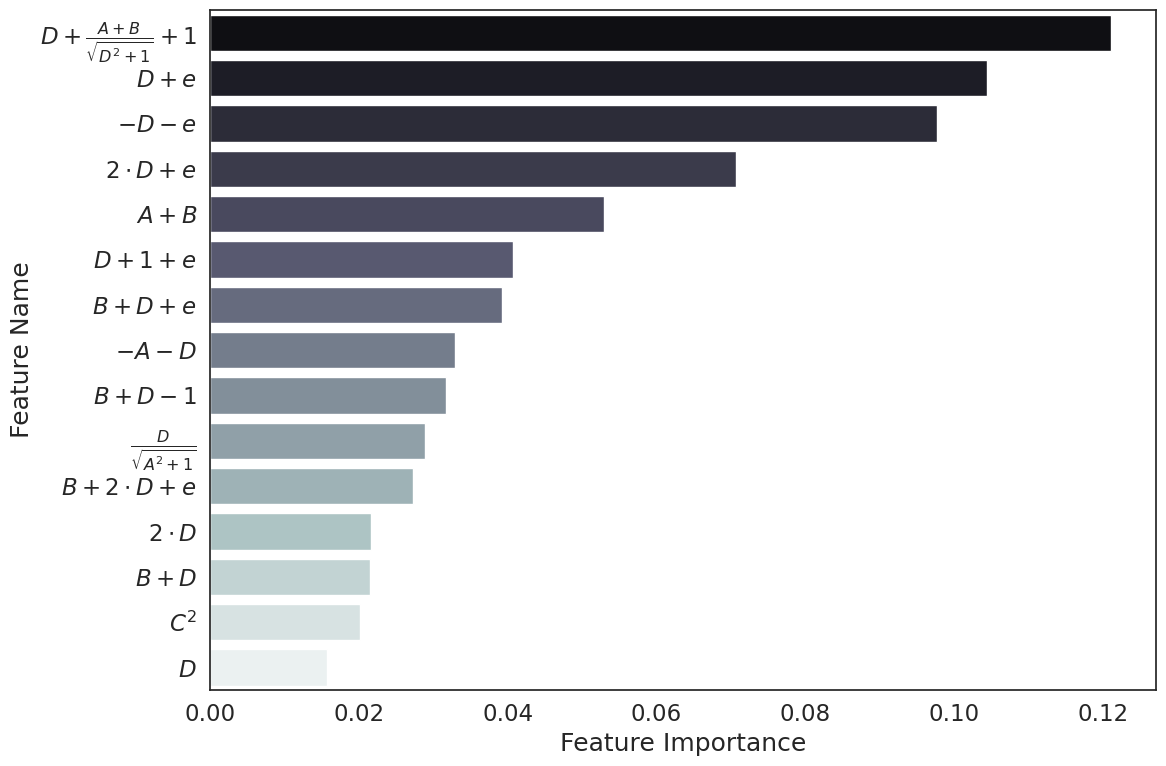

In [8]:
from evolutionary_forest.utils import get_feature_importance, plot_feature_importance

code_importance_dict = get_feature_importance(r)
plot_feature_importance(code_importance_dict)

In [ ]:
from evolutionary_forest.utils import feature_append

# Synthesize new features
code_importance_dict = get_feature_importance(r, simple_version=False)
top_features = list(code_importance_dict.keys())[:len(code_importance_dict) // 2]
new_train = feature_append(r, pd.DataFrame(r.x_scaler.transform(x_train),columns=x_train.columns), top_features, only_new_features=False)
new_test = feature_append(r, pd.DataFrame(r.x_scaler.transform(x_train),columns=x_train.columns), top_features, only_new_features=False)
new_train

# Testing with different names

In [73]:
import random
import string
import pandas as pd
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from evolutionary_forest.forest import EvolutionaryForestRegressor

random.seed(0)
np.random.seed(0)

# Generate dataset
X, y = make_friedman1(n_samples=500, n_features=17, random_state=0)

# Convert numpy arrays to pandas dataframe
X = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
y = pd.DataFrame(y, columns=['Target'])

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Evolutionary Forest
r = EvolutionaryForestRegressor(max_height=5, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True, n_process=1)
r.fit(x_train, y_train)

In [74]:
from evolutionary_forest.utils import get_feature_importance, plot_feature_importance

code_importance_dict = get_feature_importance(r)
plot_feature_importance(code_importance_dict)

data shape (400, 17) (400,)
   	      	                                                          fitness                                                           	                                size                               
   	      	----------------------------------------------------------------------------------------------------------------------------	-------------------------------------------------------------------
gen	nevals	25%          	75%          	avg          	gen	max         	median       	min          	nevals	std         	25%	75%	avg	gen	max	median	min	nevals	std
0  	200   	[-0.75170376]	[-0.27168198]	[-0.52252783]	0  	[0.39512354]	[-0.52550877]	[-1.19841231]	200   	[0.32954392]	3  	4  	3.8	0  	5  	4     	3  	200   	0.6
defaultdict(<class 'int'>, {'1': 200})
P value of different population 5.6570273077146115e-06
Add(Mul(M, A), AQ(C, F))
Sub(K, Q)
AQ(N, K)
Mul(J, L)
Add(M, D)
Mul(D, E)
Mul(H, M)
AQ(B, N)
Add(D, A)
AQ(G, M)
Unique Hash [129, 130, 127, 126, 125, 

EvolutionaryForestRegressor(basic_primitives='Add,Sub,Mul,AQ', boost_size=100,
                            cross_pb=1, gene_num=10, mab_parameter={},
                            map_elite_parameter={}, max_height=5, n_pop=200,
                            select='AutomaticLexicase', verbose=True)

In [80]:
help(get_feature_importance)

Help on function get_feature_importance in module evolutionary_forest.utils:

get_feature_importance(regr, latex_version=True, fitness_weighted=False, mean_fitness=False, ensemble_weighted=True, simple_version=None)
    :param regr: evolutionary forest
    :param latex_version: return simplified symbol, which is used for printing
    :param fitness_weighted: assign different weights to features based on fitness values
    :param mean_fitness: return mean feature importance instead of summative feature importance
    :param simple_version: alias for latex_version
    :return:



In [76]:
from evolutionary_forest.utils import get_feature_importance, plot_feature_importance

code_importance_dict = get_feature_importance(r)
plot_feature_importance(code_importance_dict)

TypeError: unsupported operand type(s) for +: 'Symbol' and 'type'

In [78]:
Error from parse_expr with transformed code: "(N /sqrt (Integer (1 )+Symbol ('J' )*Symbol ('J' )))"
TypeError: unsupported operand type(s) for /: 'function' and 'Pow'

Error from parse_expr with transformed code: "(Symbol ('B' )+O )"
TypeError: unsupported operand type(s) for +: 'Symbol' and 'type'

SyntaxError: invalid syntax (87515811.py, line 1)

In [79]:
y_train = pd.DataFrame([1 if float(i)>10 else 0 for i in y_train.values])

In [52]:
from evolutionary_forest.forest import EvolutionaryForestClassifier
# Train Evolutionary Forest
r = EvolutionaryForestClassifier(n_splits = 2)
r.fit(x_train, y_train)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


TypeError: object of type 'int' has no len()